<a href="https://colab.research.google.com/github/jcmachicao/MachineLearningAvanzado_UC_2025/blob/main/U1__Consistencia_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo sencillo de consistencia de sistema real

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

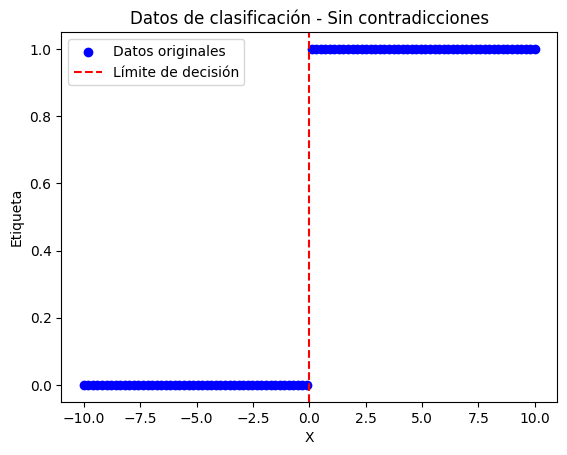

In [2]:
# Generar datos sencillos para clasificación
np.random.seed(42)
X = np.linspace(-10, 10, 100).reshape(-1, 1)  # 100 puntos en el rango [-10, 10]
y = (X > 0).astype(int).ravel()  # Etiquetas: 0 para X < 0, 1 para X >= 0

# Visualizar los datos originales
plt.scatter(X, y, color='blue', label='Datos originales')
plt.axvline(0, color='red', linestyle='--', label='Límite de decisión')
plt.title('Datos de clasificación - Sin contradicciones')
plt.xlabel('X')
plt.ylabel('Etiqueta')
plt.legend()
plt.show()

In [3]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar un modelo lineal (regresión logística)
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo sin ruido: {accuracy:.2f}')

Precisión del modelo sin ruido: 1.00


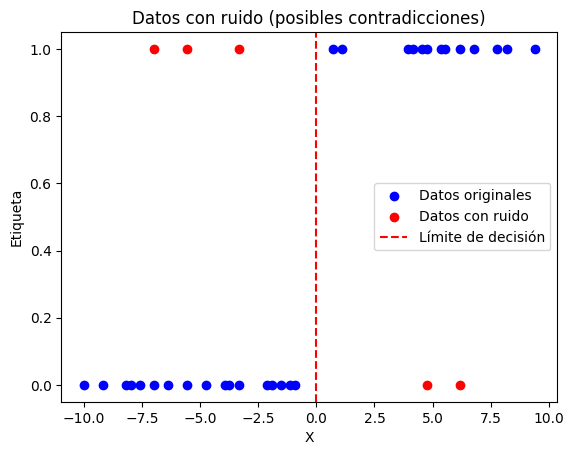

In [4]:
# Introducir ruido: Cambiar algunos puntos de forma aleatoria
np.random.seed(43)
noise_indices = np.random.choice(len(X_test), size=5, replace=False)
y_test_noisy = y_test.copy()
y_test_noisy[noise_indices] = 1 - y_test_noisy[noise_indices]  # Cambiar las etiquetas en esos puntos

# Visualizar los datos con ruido
plt.scatter(X_test, y_test, color='blue', label='Datos originales')
plt.scatter(X_test[noise_indices], y_test_noisy[noise_indices], color='red', label='Datos con ruido', zorder=5)
plt.axvline(0, color='red', linestyle='--', label='Límite de decisión')
plt.title('Datos con ruido (posibles contradicciones)')
plt.xlabel('X')
plt.ylabel('Etiqueta')
plt.legend()
plt.show()

In [5]:
# Evaluar el modelo con los datos ruidosos
y_pred_noisy = model.predict(X_test)
accuracy_noisy = accuracy_score(y_test_noisy, y_pred_noisy)
print(f'Precisión del modelo con ruido: {accuracy_noisy:.2f}')

# Comparar precisión antes y después de introducir el ruido
if accuracy_noisy < accuracy:
    print("¡El modelo perdió consistencia! La precisión disminuyó debido a contradicciones en los datos.")
else:
    print("El modelo se mantuvo consistente.")

Precisión del modelo con ruido: 0.83
¡El modelo perdió consistencia! La precisión disminuyó debido a contradicciones en los datos.
